In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from matplotlib.markers import MarkerStyle
from matplotlib.colors import Normalize


# Experiment Setup

```
Query 5
ITR: 2 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000
DVFS: 0c00 0d00 0e00 0f00 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 1a00 
RATE: 100000 200000 300000
NSOURCES: 16
NWINDOWS: 16
NSINKS: 16
WindowLength: 60
```

In [4]:
df_comb = pd.read_csv("window16/windowlength60/combined.csv")
df_comb["SourcenumRecordsOutPerSecond_percent"] = 1.0-(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate'])
df_comb["SourcenumRecordsOutPerSecond_percent"] = df_comb["SourcenumRecordsOutPerSecond_percent"].apply(lambda x: 0.0 if x <= 0.0 else x)
df_comb["ratek"] = df_comb['SourcenumRecordsOutPerSecond_avg']/1000.0
df_comb["itrm"] = df_comb["itr"]/1000.0

In [29]:
def graph(rate, dfo, dfu, dfpo, dfpe, dfs, left=-0.1, right=1.1, metric='SourcenumRecordsOutPerSecond_percent'):
    plt.rcParams['figure.figsize'] = 6, 4
    plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

    fig, ax = plt.subplots()

    scatter_c1 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=400, c=dfu.itrm, edgecolor="black", 
                            cmap='Blues', marker=MarkerStyle("o", fillstyle="right"), label="userspace", alpha=0.8)

    scatter_c2 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=400, c=dfu.dvfs, edgecolor="black", 
                            cmap='Reds', marker=MarkerStyle("o", fillstyle="left"), alpha=0.8)

    ax.scatter(dfo[metric].tolist(),
                            dfo['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='lime',
                           marker=MarkerStyle("o"), label="ondemand")
    
    ax.scatter(dfpo[metric].tolist(),
                            dfpo['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='cyan',
                           marker=MarkerStyle("o"), label="powersave")

    ax.scatter(dfpe[metric].tolist(),
                            dfpe['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='magenta',
                           marker=MarkerStyle("o"), label="performance")

    ax.scatter(dfs[metric].tolist(),
                            dfs['pkg_watts_avg'].tolist(), s=400, edgecolor="black", c='yellow',
                           marker=MarkerStyle("o"), label="schedutil")

    # Add colorbars
    #cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='horizontal', label="ITR (ms)")
    #cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='horizontal', label="DVFS (Ghz)")

    ax.set_xlabel('RPS (K)')
    ax.set_ylabel('Power (W)')
    ax.set_xlim(left=left, right=right)
    #ax.set_ylim(bottom=50)

    ax.set_title(f"Query5 @ {int(rate)}K RPS", size=22)
    #plt.legend(fontsize=22, loc='upper left')
    plt.grid()
    plt.tight_layout()

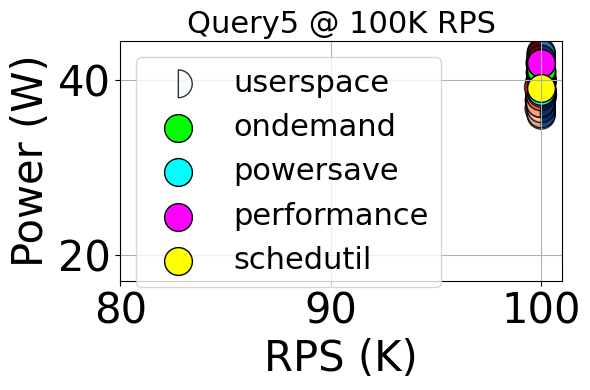

In [26]:
rate = 100000
ratek = rate/1000.0
dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 80, int(ratek+(ratek*0.01)), metric='ratek')
plt.savefig("query5itrdvfs100K.pdf", bbox_inches='tight')

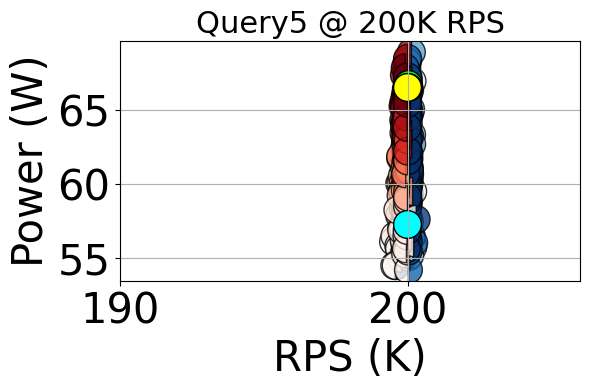

In [35]:
rate = 200000
ratek = rate/1000.0
dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 190, int(ratek+(ratek*0.03)), metric='ratek')
plt.savefig("query5itrdvfs200K.pdf", bbox_inches='tight')

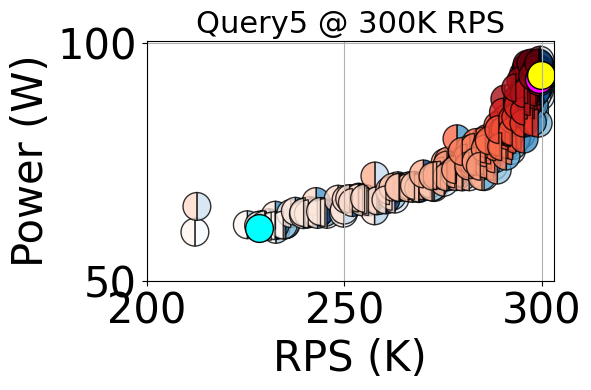

In [21]:
rate = 300000
ratek = rate/1000.0
dfo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'ondemand')]
dfpo = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'powersave')]
dfpe = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'performance')]
dfs = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'schedutil')]
dfu = df_comb[(df_comb.rate == rate) & (df_comb.policy == 'userspace')]
graph(rate/1000, dfo, dfu, dfpo, dfpe, dfs, 200, int(ratek+(ratek*0.01)), metric='ratek')
plt.savefig("query5itrdvfs300K.pdf", bbox_inches='tight')

In [13]:
def graph(rate, dfo, dfu, wlen=0, left=-0.1, right=1.1, metric='SourcenumRecordsOutPerSecond_percent'):
    plt.rcParams['figure.figsize'] = 25, 10
    plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=30)    # fontsize of the tick labels

    fig, ax = plt.subplots()

    scatter_c1 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=500, c=dfu.itr, edgecolor="black", 
                            cmap='Blues', marker=MarkerStyle("o", fillstyle="right"), label="userspace")

    scatter_c2 = ax.scatter(dfu[metric].tolist(),
                            dfu['pkg_watts_avg'].tolist(), s=500, c=dfu.dvfs, edgecolor="black", 
                            cmap='Reds', marker=MarkerStyle("o", fillstyle="left"))

    ax.scatter(dfo[metric].tolist(),
                            dfo['pkg_watts_avg'].tolist(), s=500,edgecolor="black", c='lime',
                           marker=MarkerStyle("o"), label="ondemand")

    # Add colorbars
    cbar_c1 = plt.colorbar(scatter_c1, ax=ax, orientation='vertical', label="ITR-delay (us)")
    cbar_c2 = plt.colorbar(scatter_c2, ax=ax, orientation='vertical', label="DVFS (Ghz)")

    ax.set_xlabel(metric)
    ax.set_ylabel('Power (W)')
    ax.set_xlim(left=left, right=right)
    #ax.set_ylim(bottom=35, top=110.0)

    ax.set_title(f"Query5: {dfu['nwindows'].iloc[0]} Windows, WindowLength {wlen} @ {rate}K RPS", size=22)
    plt.legend(fontsize=22)

    plt.tight_layout()

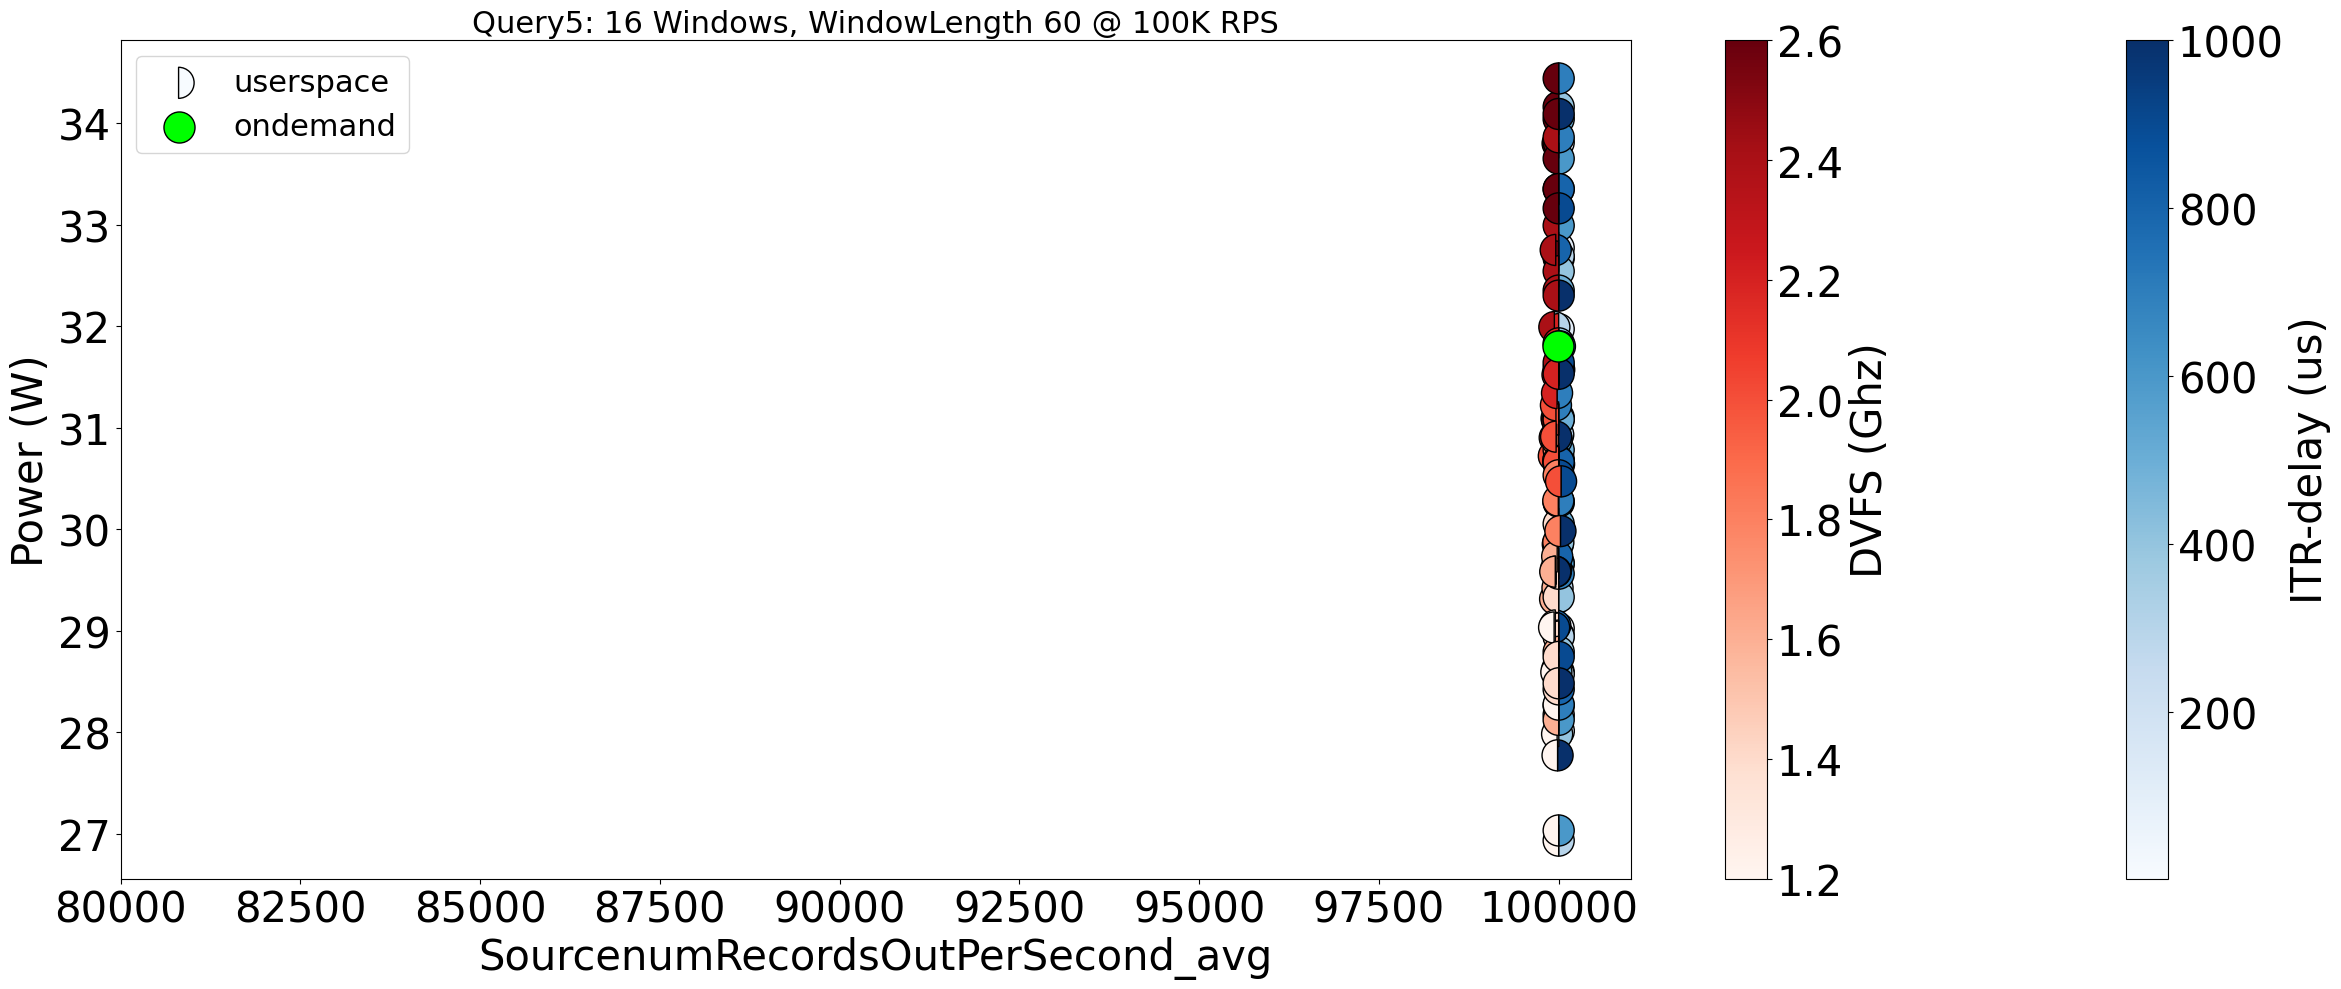

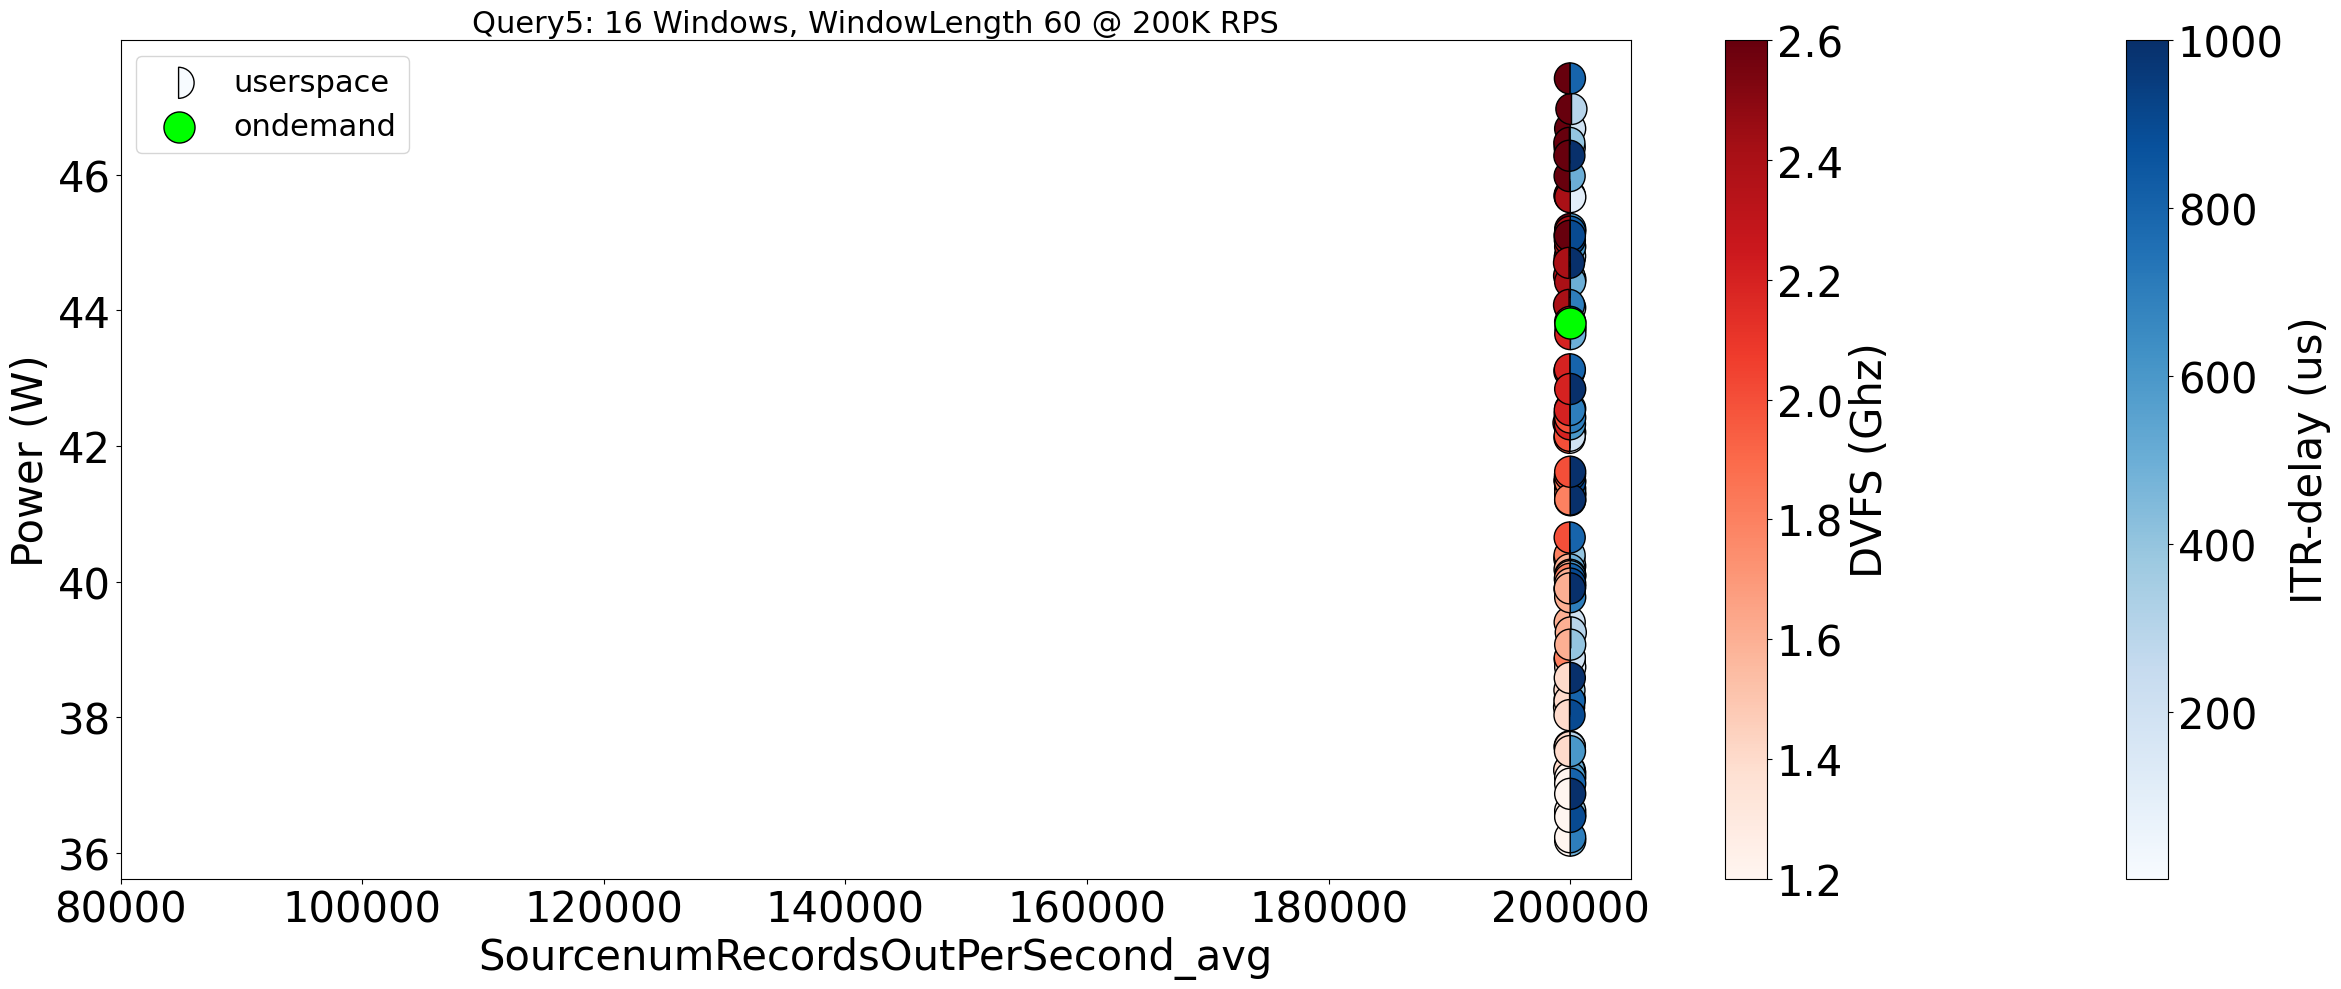

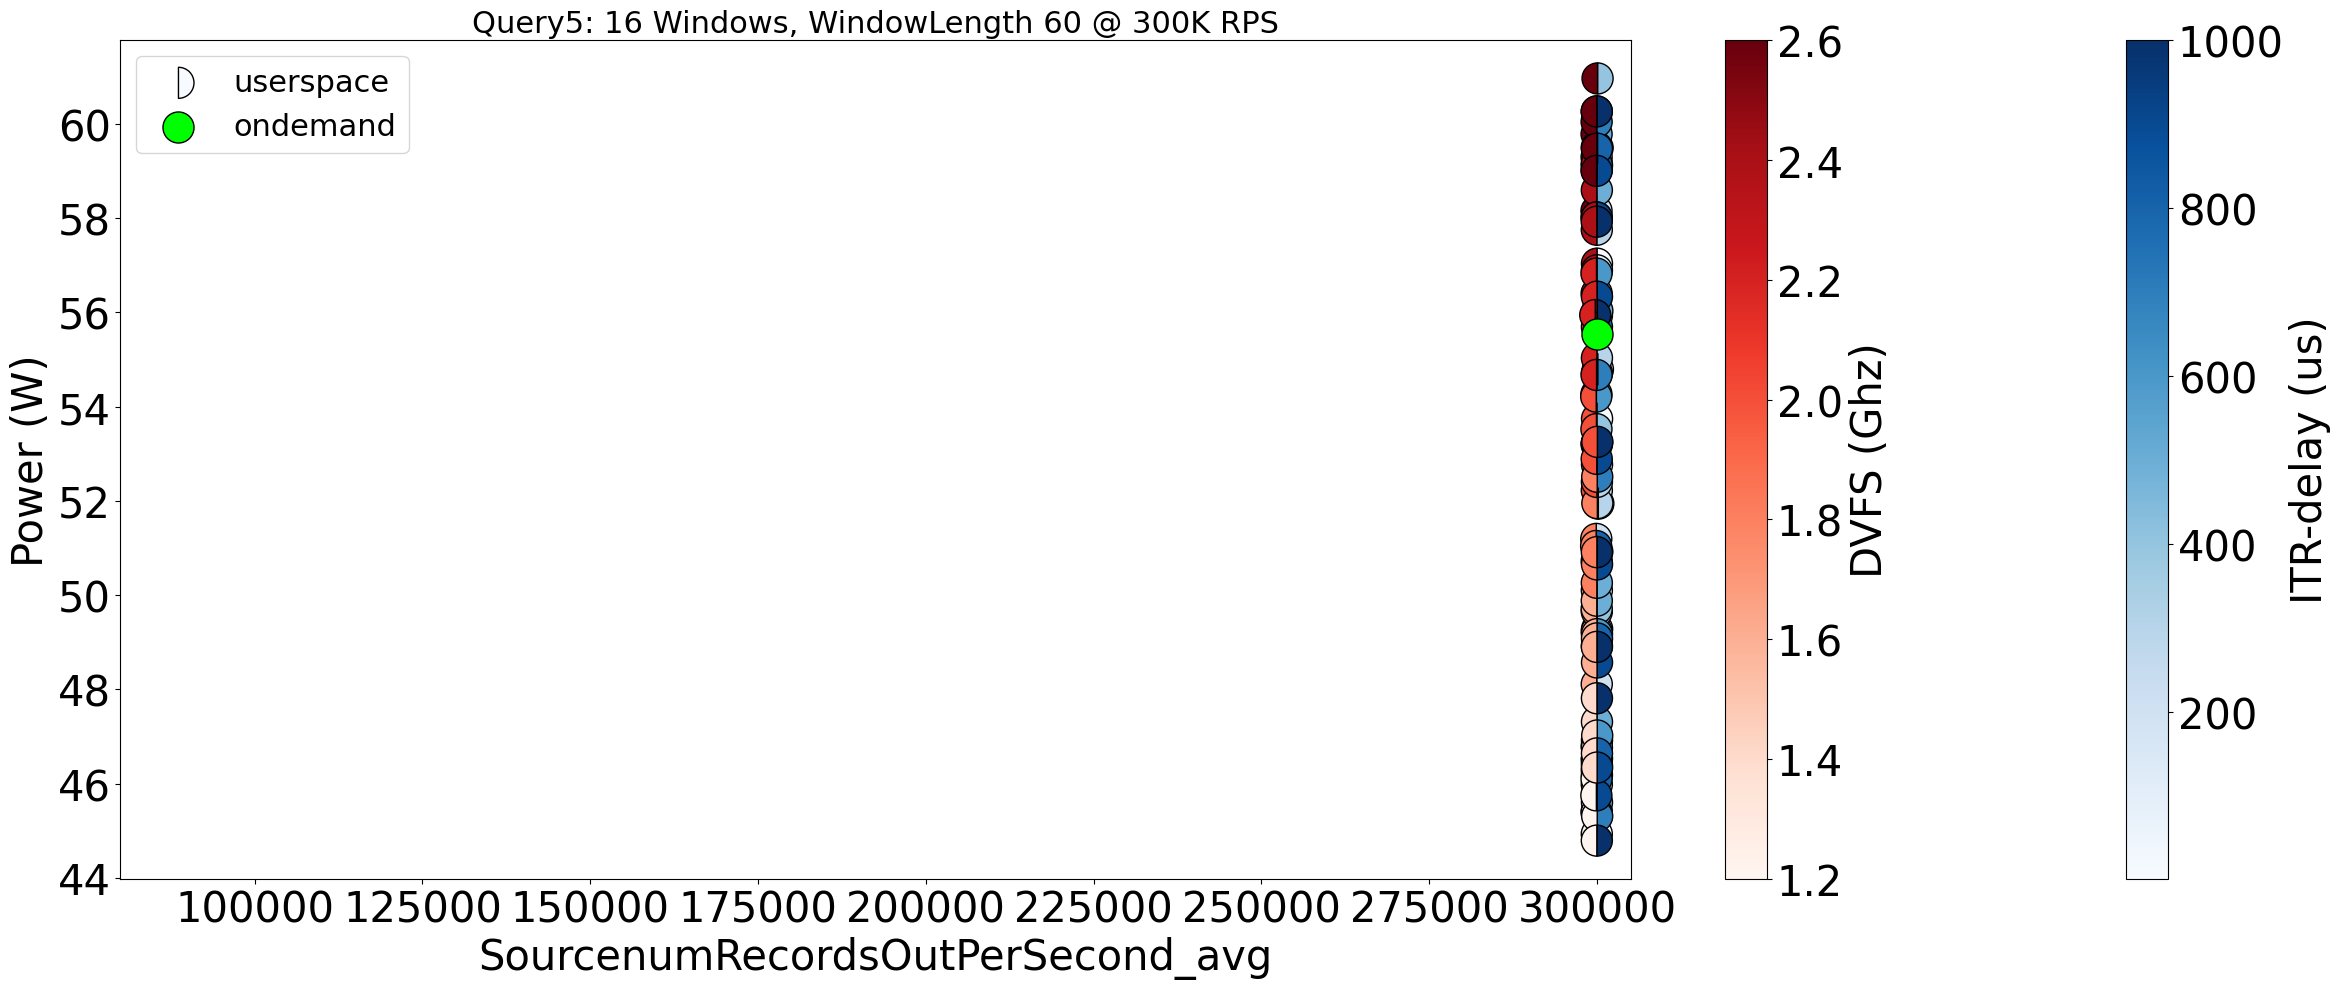

In [14]:
df100o = df_comb[(df_comb.rate == 100000) & (df_comb.policy == 'ondemand')]
df100u = df_comb[(df_comb.rate == 100000) & (df_comb.policy == 'userspace')]
graph(100, df100o, df100u, 60, 80000, 101000, metric='SourcenumRecordsOutPerSecond_avg')

df200o = df_comb[(df_comb.rate == 200000) & (df_comb.policy == 'ondemand')]
df200u = df_comb[(df_comb.rate == 200000) & (df_comb.policy == 'userspace')]
graph(200, df200o, df200u, 60, 80000, 205000,metric='SourcenumRecordsOutPerSecond_avg')

df300o = df_comb[(df_comb.rate == 300000) & (df_comb.policy == 'ondemand')]
df300u = df_comb[(df_comb.rate == 300000) & (df_comb.policy == 'userspace')]
graph(300, df300o, df300u, 60, 80000, 305000,metric='SourcenumRecordsOutPerSecond_avg')   


# Experiment Setup

```
[INFO] Input: MQUERY query5
[INFO] Input: DVFS 0c00 0e00 1000 1200 1400 1600 1800 1a00
[INFO] Input: ITRS 2 100 200 300 400 500 600 700 800 900 1000
[INFO] Input: NITERS 0
[INFO] Input: FLINK_RATE 100000_300000 200000_300000 300000_300000
[INFO] Input: FLINK_RATE_TYPE static
[INFO] Input: BUFF -1
[INFO] Input: NCORES 16
[INFO] Input: IPWINDOW 10.10.1.3
[INFO] Input: MCFG 1;16;16
[INFO] Input: WINDOW_LENGTH 20
[INFO] Input: FLINK_CHECKPOINTING_ENABLED false
[INFO] Input: FLINK_CHECKPOINTING_INTERVAL 10000
[INFO] Input: FLINK_CHECKPOINTING_MODE exactly_once
[INFO] Input: FLINK_ROCKSDB_STATE_BACKEND_ENABLED false
```

In [10]:
df_comb = pd.read_csv("window16/windowlength20/combined.csv")
df_comb["SourcenumRecordsOutPerSecond_percent"] = 1.0-(df_comb['SourcenumRecordsOutPerSecond_avg']/df_comb['rate'])
df_comb["SourcenumRecordsOutPerSecond_percent"] = df_comb["SourcenumRecordsOutPerSecond_percent"].apply(lambda x: 0.0 if x <= 0.0 else x)

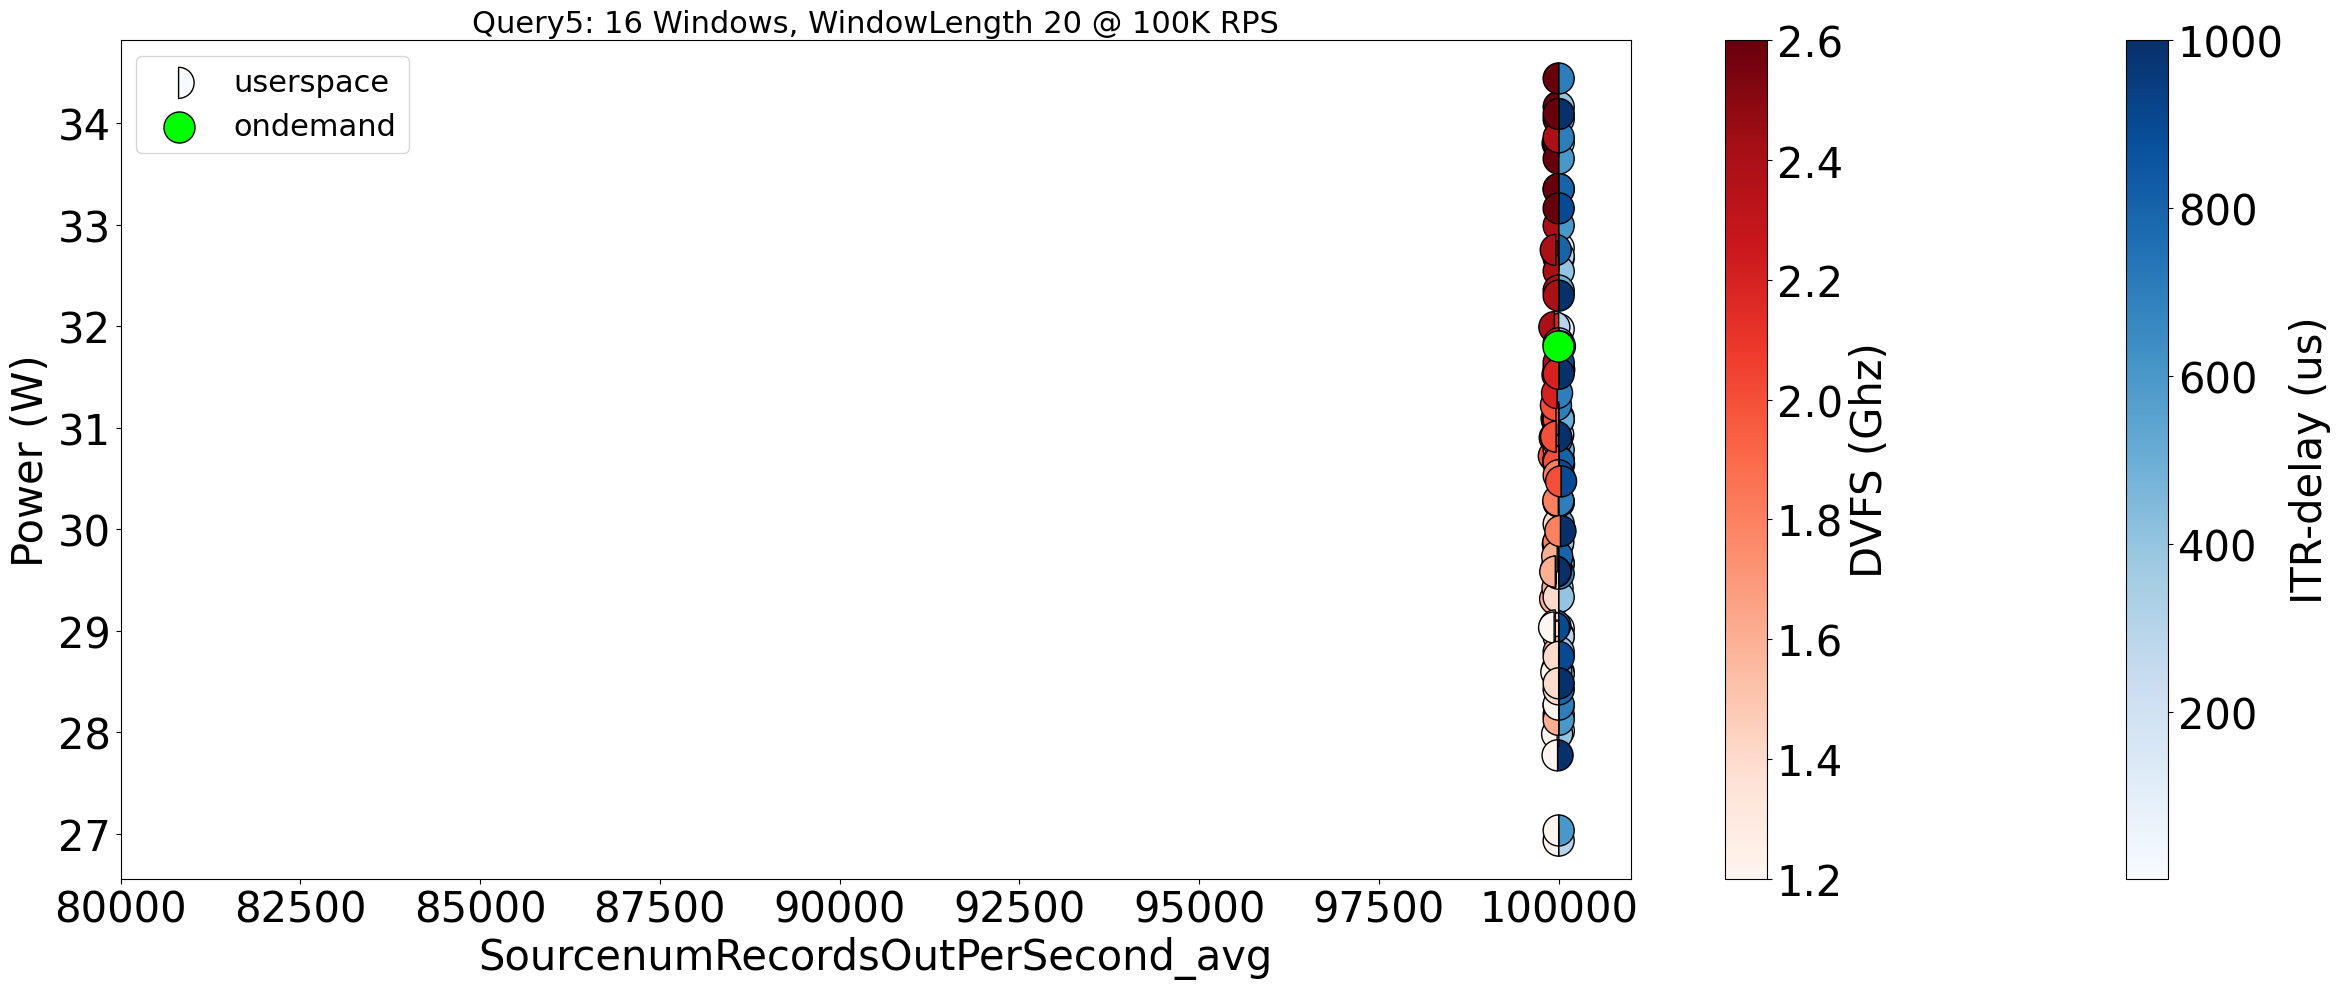

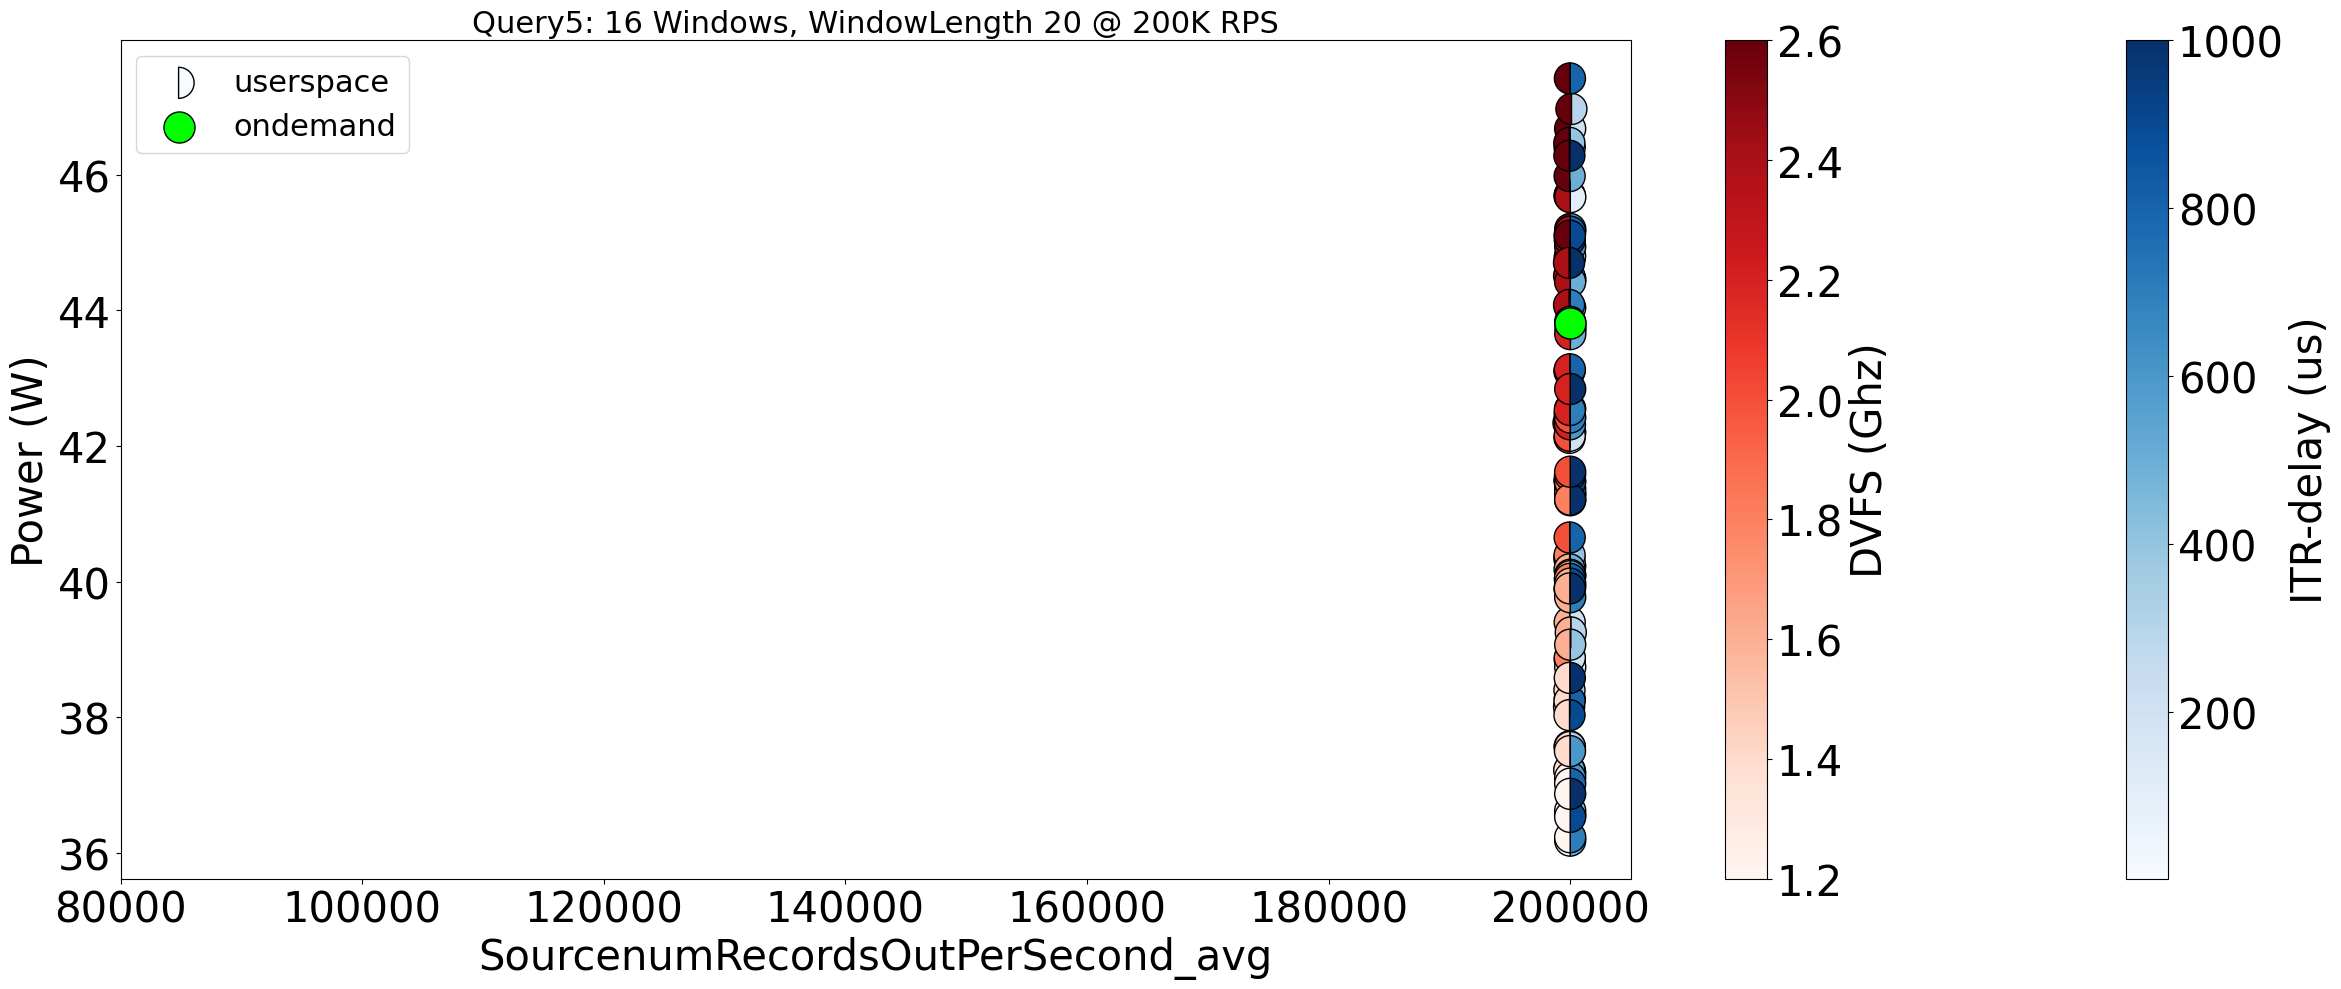

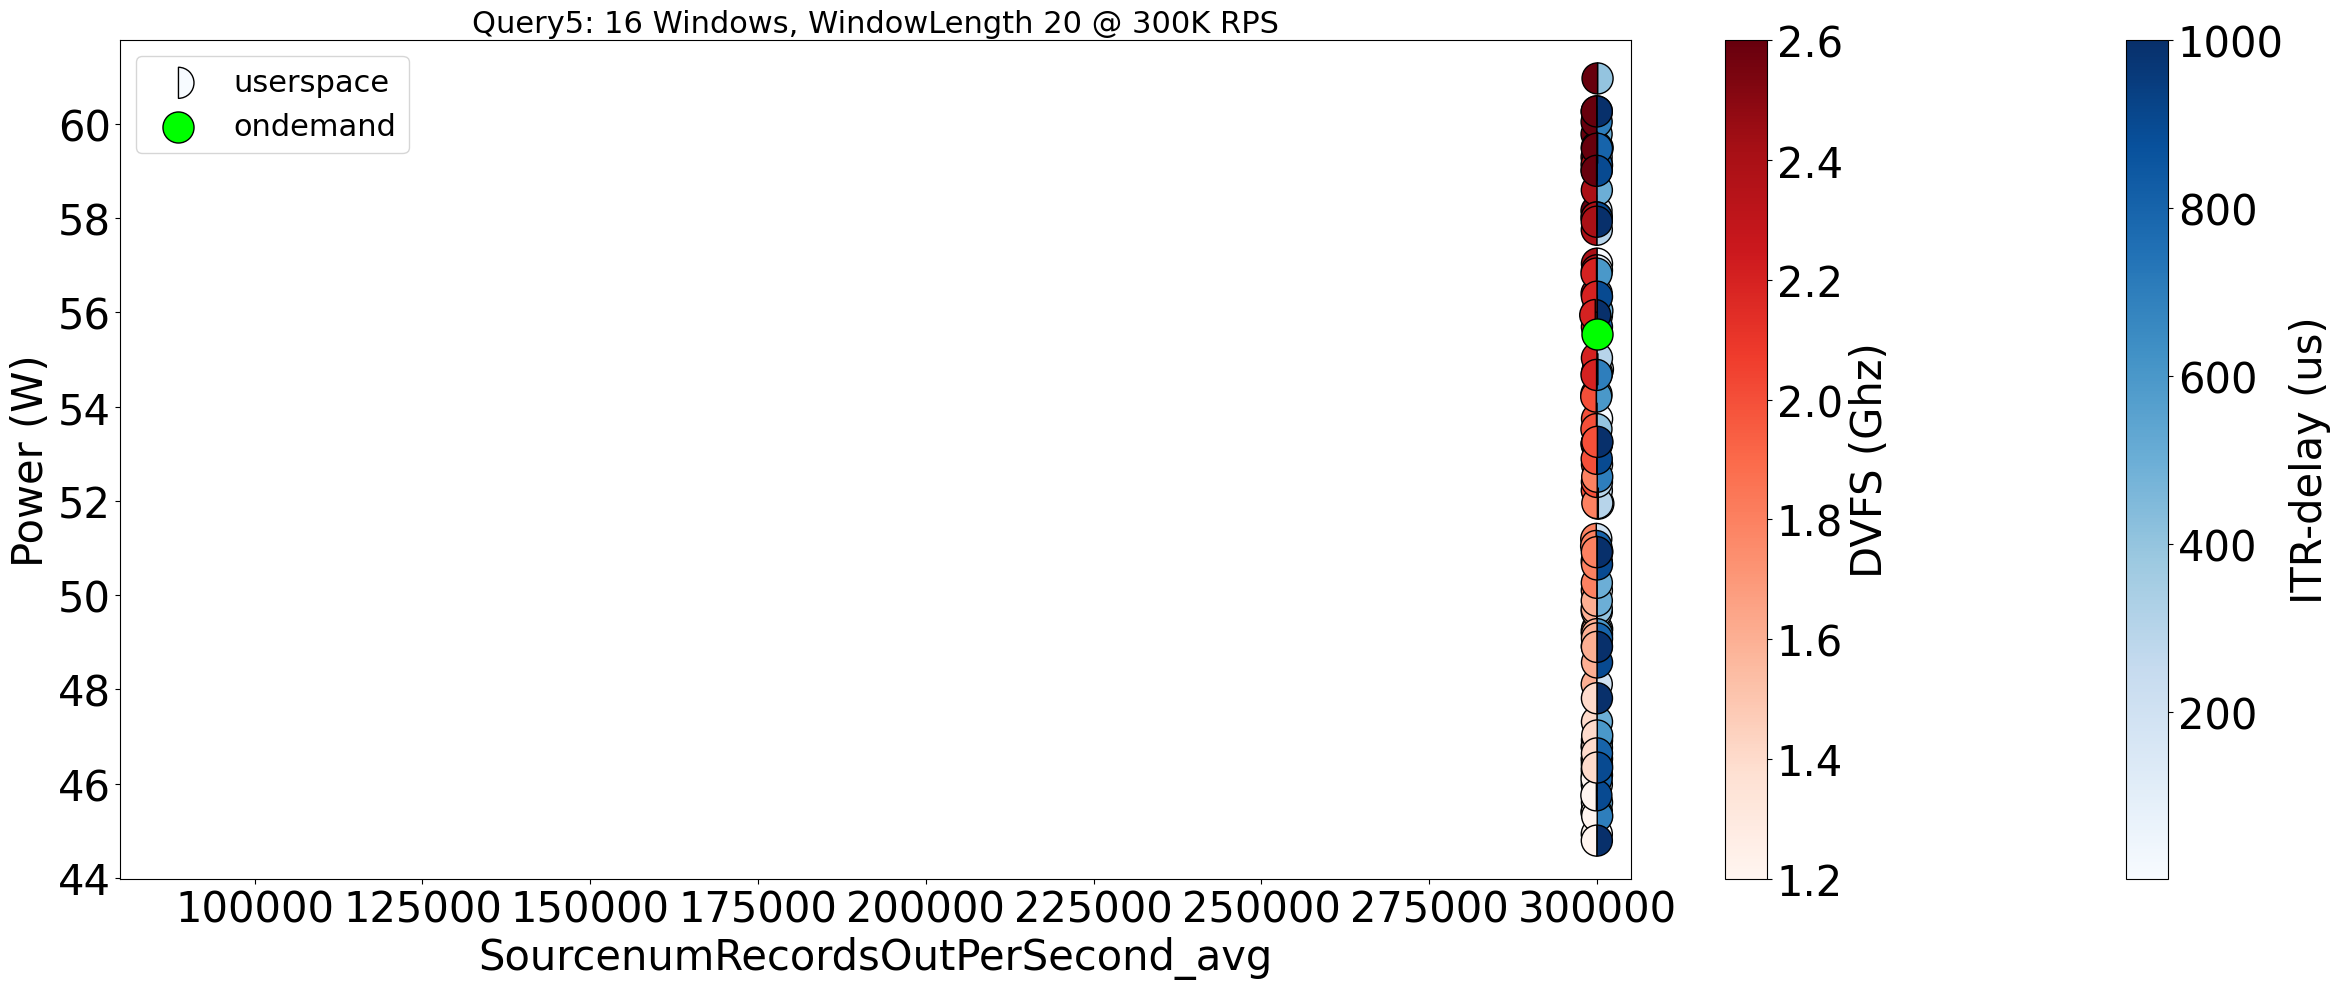

In [15]:
df100o = df_comb[(df_comb.rate == 100000) & (df_comb.policy == 'ondemand')]
df100u = df_comb[(df_comb.rate == 100000) & (df_comb.policy == 'userspace')]
graph(100, df100o, df100u, 20, 80000, 101000, metric='SourcenumRecordsOutPerSecond_avg')

df200o = df_comb[(df_comb.rate == 200000) & (df_comb.policy == 'ondemand')]
df200u = df_comb[(df_comb.rate == 200000) & (df_comb.policy == 'userspace')]
graph(200, df200o, df200u, 20, 80000, 205000,metric='SourcenumRecordsOutPerSecond_avg')

df300o = df_comb[(df_comb.rate == 300000) & (df_comb.policy == 'ondemand')]
df300u = df_comb[(df_comb.rate == 300000) & (df_comb.policy == 'userspace')]
graph(300, df300o, df300u, 20, 80000, 305000,metric='SourcenumRecordsOutPerSecond_avg')  